[![Open In Binder](https://static.mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/OleBo/MathSo/main?filepath=/notebooks/SolutionHW11.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OleBo/MathSo/blob/main/notebooks/SolutionHW11.ipynb)


[browse](http://colab.research.google.com/github/OleBo/MathSo/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qpsolvers import solve_qp, available_solvers
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import minimize

#  Homework assignment 11
An investor would likes to invest a certain amount of three assets in its 
portfolio. The return of which is given by the three random variables $R_1,
R_2, R_3$. The expected values are

\[ \mu_1 = 0.01, \; \mu_2 = 0.022, \; \mu_3 = 0.027\]

In [2]:
mu=np.array([0.01, 0.022, 0.027])
mu

array([0.01 , 0.022, 0.027])

and be the covariance matrix
\[ \sigma_{ij} = \left( \begin{array}{ccc} 0.001 & 0.0002 & 0.0005 \\
0.0002 & 0.005 & 0.0008 \\ 0.0005 & 0.0008 & 0.02 \end{array} \right). \]

In [3]:
sigma = np.array([[0.001, 0.0002, 0.0005], [0.0002, 0.005, 0.0008], [0.0005, 0.0008, 0.02]])
sigma

array([[0.001 , 0.0002, 0.0005],
       [0.0002, 0.005 , 0.0008],
       [0.0005, 0.0008, 0.02  ]])

Let $p_i$ be the portion of the sum invested in $R_i$ such that $p_1 + p_2 +
p_3 = 1$. The investor
wants to minimize the risk of the entire portfolio, i.e.

\[ \mathrm{Var}\left(\sum_{i=1}^{3} p_i R_i\right) =
\sqrt{\sum_{i,j=1}^{3} p_i p_j \sigma_{ij}}, \]

**Then the function to be minimised (objective function) is:**
$$f:\mathbf{R}^3\to \mathbf{R}, \quad f(p) = \sqrt{p_1 p_1 \sigma_{1,1}+\dots+p_3 p_3 \sigma_{3,3}}$$

In [4]:
f = lambda p: np.sqrt(np.dot(np.dot(p,sigma),p))

being the expected rate of return
\[ \sum_{i=1}^3 p_i \mu_i \]
but should be at least 2\%.

This is known as the [efficient frontier](https://www.investopedia.com/terms/e/efficientfrontier.asp):

"The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk."

## Constraint Optimization Problem
**Then the constraints are:**

$$\mu_1p_1 + \mu_2p_2 + \mu_3p_3 \geq 0.02$$
$$p_i>=0$$
$$p_1+p_2+p_3=1$$

Here we have inequalities, equalities and lower bounds on the unknowns.

The linear constraints $\mu_1p_1 + \mu_2p_2 + \mu_3p_3 \geq 0.02$, $p_1+p_2+p_3=1$ have the general inequality form

$$l_b\le Ap\le u_b$$

where the vectors for lower bound $l_b$, upper bound $u_b$, and the independent variables $p$ is passed as ndarray of shape (n,) and the matrix $A$ has shape (m, n), where n is the number of constraints and m is the number of independent variables.

It is possible to use equal bounds to represent an equality constraint or infinite bounds to represent a one-sided constraint.

This can be written in the linear constraint standard format:

In [5]:
A = np.array([mu, [1, 1, 1]])
lb = np.array([0.02, 1])
ub = np.array([np.inf, 1])
linear_constraint = LinearConstraint(A,lb,ub)

The bound constraints of the independent variables $p_1,p_2,p_3 \geq 0$ are defined using a Bounds object.

In [6]:
lb = [0, 0, 0]
ub = [np.inf, np.inf, np.inf]
bounds = Bounds(lb, ub)

Finally, we specify an initial vector:

In [7]:
p0 = np.array([1, 1, 1])/3

The method 'trust-constr' requires the constraints to be defined as a sequence of objects `LinearConstraint` and `NonlinearConstraint`. The implementation is based on [EQSQP] for equality-constraint problems and on [TRIP] for problems with inequality constraints. Both are trust-region type algorithms suitable for large-scale problems.

In [8]:
Nfeval = 1

def callbackF(pi,_):
    global Nfeval
    print('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}   {4: 3.6f}'.format(Nfeval, pi[0], pi[1], pi[2], f(pi)))
    Nfeval += 1

print('{0:4s}   {1:9s}   {2:9s}   {3:9s}   {4:9s}'.format('Iter', ' p_1', ' p_2', ' p_3', ' f(p)'))  

res = minimize(f, p0, method='trust-constr',
               callback=callbackF,
               constraints=linear_constraint,
               options={'verbose': 1}, 
               bounds=bounds)
res.x

Iter    p_1         p_2         p_3         f(p)    
   1    0.333333    0.333333    0.333333    0.056765
   2    0.367168    0.349787    0.283045    0.051600
   3    0.491822    0.433834    0.250979    0.053158
   4    0.409141    0.360958    0.265874    0.050537
   5    0.390917    0.365720    0.279292    0.052072
   6    0.390917    0.365720    0.279292    0.052072
   7    0.554469    0.301041    0.154415    0.038265
   8    0.493321    0.331717    0.184021    0.041530
   9    0.493321    0.331717    0.184021    0.041530
  10    0.680612    0.226848    0.095412    0.032618
  11    0.623777    0.269390    0.110008    0.034311
  12    0.462998    0.387173    0.150643    0.040651
  13    0.462998    0.387173    0.150643    0.040651
  14    0.241627    0.563663    0.194720    0.051792
  15    0.241627    0.563663    0.194720    0.051792
  16    0.237023    0.574399    0.188578    0.051861
  17    0.239456    0.578281    0.182262    0.051589
  18    0.239456    0.578281    0.182262    0.

array([0.24163581, 0.57837831, 0.17998588])

## Quadratic Programming Problem

The efficient frontier is a convex quadratic optimization problem with linear constraints. Such problems are special cases of ***Quadratic Programming*** problems.


Quadratic programming (QP) problems are of the form:

  $$\begin{split}\begin{array}{ll}
        \mbox{minimize} &
            \frac{1}{2} x^T P x + q^T x \\
        \mbox{subject to}
            & G x \leq h                \\
            & A x = b                    \\
            & lb \leq x \leq ub
    \end{array}\end{split}$$

where $P$ is an $n\times n$ matrix, $x$ and $q$ are $n\times 1$ vectors ($n$ is the number of parameters). As for the inequality and equality constraints $G$ and $A$ are $m\times n$ matrices. The vectors $h$ and $b$ are of dimension $m$ ($m$ is the number of respective constraints).

Consider first the problem to find the global minimum variance portfolio (3). The objective function can be recovered from (10) by setting $x=p$, $P=2\times\sigma$ and $q=[0,\dots,0]$.

We are using one of the available QP solvers.

In [9]:
available_solvers

['quadprog']

In [10]:
# efficient fonier
P = sigma
q = np.array([.0,.0,.0]).reshape((3,))
G = -mu.reshape((3,))
h = -np.array([0.02]).reshape((1,))
A = np.array([1., 1., 1.]).reshape((3,))
b = np.array([1.]).reshape((1,))
lb = np.array([0, 0, 0]).reshape((3,))
ub = np.array([np.inf, np.inf, np.inf])

x = solve_qp(P, q, G, h, A, b, lb, ub)
print("QP solution: x = {}".format(x))
f(x)

QP solution: x = [0.2416535  0.57837811 0.17996839]


0.05142679775622339

## Risk-return characteristics 

The impact of the no short sales restrictions on the risk-return characteristics of feasible portfolios is nicely illustrated by constructing random long-only portfolios of these three assets:

In [11]:
np.random.seed(123)
x1 = np.random.uniform(0,1,400)
x2 = np.random.uniform(0,1,400)
x3 = 1-x1-x2
long_only = np.where(x3>0)[0]
x1 = x1[long_only]
x2 = x2[long_only]
x3 = x3[long_only]
len(long_only)

193

Here we first create 400 random weights for the first two assets that lie between zero and one, respectively. Then, we determine the weight on the third asset and throw out portfolios for which the weight on the third asset is negative. The remaining 193 portfolios are then long-only portfolios. 

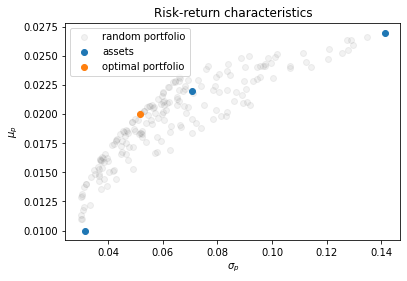

In [12]:
fig, ax = plt.subplots()
ax.set_title('Risk-return characteristics')
ax.set(xlabel='$\sigma_p$', ylabel='$\mu_p$')
ax.scatter(np.array([f(x) for x in zip(x1,x2,x3)]),np.dot(mu,[x1,x2,x3]),c='gray' ,alpha=.1, label='random portfolio')
ax.scatter(np.sqrt(np.diag(sigma)),mu,label='assets')
ax.scatter(f(x),np.dot(mu,x),label='optimal portfolio')
ax.legend()
plt.show()